<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Generative AI for Business Applications</center></font>
<center><font size=6>Multimodal Generative AI</center></font>

<center><p float="center">
  <img src="https://images.pexels.com/photos/205961/pexels-photo-205961.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1" width="720"/>
</p></center>

<center><font size=6>Marketing Campaign Creatives Generation</center></font>

# Problem Statement

## Business Context

In today’s competitive food industry, establishing a strong online presence is crucial for small businesses like Browbake, a new bakery that specializes in rich brownies and tres leches cakes. To attract more customers and build brand awareness, Browbake recognizes the necessity of high-quality promotional content that effectively showcases their delicious offerings. However, crafting visually appealing posters and engaging videos poses significant challenges for small businesses due to the associated costs and time constraints of traditional marketing methods.

As Browbake continues to grow, the need for cost-effective digital marketing solutions becomes increasingly important. With limited resources for hiring professional designers or marketers, Browbake is seeking innovative ways to create eye-catching marketing materials that can be easily shared across social media and other digital platforms. Leveraging artificial intelligence presents an opportunity to streamline the content creation process while maintaining high standards of quality and impact.

## Objective

To address the challenge of producing compelling promotional materials efficiently, Browbake plans to implement AI-driven solutions to enhance their digital marketing efforts. The objective is to develop AI models capable of generating professional-quality content that resonates with their target audience and highlights the brand’s unique products.

As an AI Engineer, your goal is to assist Browbake in creating a series of promotional materials, including:

1. A visually appealing promotional poster that effectively highlights Browbake's offerings, enticing potential customers.
2. An engaging promotional video that showcases the delectable cakes, complemented by a catchy tagline that captures the essence of the brand.
3. A fitting voiceover for the video that aligns with Browbake's brand tone, enhancing the overall appeal of the promotional content.

The final deliverable will be a cohesive marketing video that combines the visuals, tagline, and voiceover, tailored for online advertising and social media campaigns. By implementing this AI-driven approach, Browbake aims to efficiently produce high-quality content that maximizes its marketing impact while minimizing costs and time spent. Ultimately, this initiative will help boost Browbake's online presence, attract more customers, and support the bakery's growth in a crowded marketplace.

# Installing and Importing the Necessary Libraries

In [1]:
!pip install -q torch==2.6.0 \
              torchvision==0.21.0 \
              torchaudio==2.6.0 \
              diffusers==0.33.1 \
              soundfile==0.13.1 \
              parler-tts==0.2.3 \
              Pillow==11.2.1 \
              moviepy==1.0.3 \
              pydub==0.25.1 \
              google-genai==1.17.0 \
              mediapy==1.2.4

**Note:**
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
# Imprting the necessary libraries

# Image Generation Libraries (Task 1: Promotional Poster)
from diffusers import AutoPipelineForText2Image, DiffusionPipeline
import torch

# Google Generative AI Libraries (Task 2: Promotional Video)
from google import genai
from google.genai import types

# Text-to-Speech Libraries (Task 3: Voiceover)
from parler_tts import ParlerTTSForConditionalGeneration
from transformers import pipeline, AutoTokenizer
import soundfile as sf

# Image Editing Libraries
from PIL import Image, ImageDraw, ImageFont

# Video Editing Libraries (Task 4: Combining Video and Voiceover)
from moviepy.editor import VideoFileClip, AudioFileClip

# Utility Libraries
import os
import sys
import time
import urllib
import matplotlib.pyplot as plt
import mediapy as media

Flash attention 2 is not installed


**Image Generation Libraries (Task 1: Promotional Poster)**
- `diffusers`: A library by Hugging Face designed to work with diffusion-based generative models like Stable Diffusion. These models create high-quality images from text prompts.

- `AutoPipelineForText2Image`, `DiffusionPipeline`: Specific classes from the `diffusers` library used to simplify the loading and execution of pre-trained text-to-image models. They abstract away complex model details so we can focus on generating images from text.

- `torch`: The PyTorch library, which is essential for running deep learning models. It supports operations on tensors and leverages GPU acceleration for faster computations.


**Google Generative AI Libraries (Task 2: Promotional Video)**
- `google.genai`: The main SDK provided by Google to interact with its generative AI models, such as Veo for video generation and Gemini for chat or language-based tasks.

- `google.genai.types`: Contains structured data types and configurations used when interacting with Google models—like setting video duration, style, and prompt inputs.


**Text-to-Speech Libraries (Task 3: Voiceover)**
- `parler_tts.ParlerTTSForConditionalGeneration`: A powerful TTS (text-to-speech) model that turns text into natural human-like speech. This model allows custom control over the voice's tone, pace, and clarity.

- `transformers.pipeline`: A high-level interface from Hugging Face to quickly perform tasks like text generation, translation, or speech synthesis using pre-trained models.

- `AutoTokenizer`: A tool that converts human-readable text into numerical tokens that the model can understand. It ensures proper formatting and compatibility with the specific model you're using.

- `soundfile (sf)`: Used for reading and writing audio files. In this project, it's used to save the generated voiceover into .wav format.

**Image Editing Libraries**
- `PIL (Python Imaging Library)`: A widely used image processing library. It allows us to open, edit, and save images in many formats.

  - `Image`: Used to load and save images.

  - `ImageDraw`: Lets you draw shapes, text, and annotations on images.

  - `ImageFont`: Allows you to set custom fonts when adding text to an image.


**Video Editing Libraries (Task 4: Combine Voiceover and Video)**
- `moviepy.editor`: A Python library for video editing. It enables loading, combining, trimming, and exporting videos and audio.

- `VideoFileClip`: Loads video files so we can manipulate or attach audio to them.

- `AudioFileClip`: Loads audio files to overlay them on video files.


**Utility Libraries**
- `os`: Interacts with the operating system (e.g., for file checks, creating folders, or navigating directories).

- `sys`: Gives access to system-specific parameters, useful for things like managing paths or checking Python environment details.

- `time`: Used to manage timing, such as adding pauses between steps (e.g., waiting for a generation process to finish).

- `urllib`: A standard Python library used to open and read URLs. It helps with downloading resources like model weights or media assets.

- `matplotlib.pyplot`: A visualization library to display or debug generated images, especially when you want to check results inside the notebook.

- `mediapy`: Simplifies media playback (images, audio, video) within Jupyter Notebooks. It helps quickly preview the generated video or audio without leaving the notebook.

# Task 1: Promotional Poster Generation Using AI

In today’s digital-first world, eye-catching visuals play a crucial role in attracting customers, especially for businesses like Browbake, a bakery specializing in brownies and tres leches cakes. To enhance their brand visibility without relying on traditional design tools, we’ll use Generative AI to automatically create a stunning promotional poster.

In this task, we’ll explore two different approaches to generate promotional posters using AI:
- Using ChatGPT (No-Code Tool)
- Using an Open-Source Model via Hugging Face and Python SDK

Both methods convert a well-crafted text prompt into a visually rich image that represents Browbake’s brand and offerings. We'll then compare the results and discuss insights.

## The Prompt We Will Use

Before diving into the two approaches, here’s the unified prompt we'll be using to instruct both tools:

> **Prompt:**

> “Create a visually appealing promotional poster for my small baking business, Browbake, which specializes in brownies and tres leches cakes. The poster should include the company name prominently, along with catchy taglines that highlight the rich flavors and indulgence of our baked goods (e.g., ‘Pure Bliss in Every Bite’ or ‘Decadence, Redefined’). Use a warm, inviting color palette with elements that emphasize the texture and richness of brownies and the creamy, moist nature of tres leches. The design should be modern, elegant, and mouthwatering, appealing to dessert lovers. Optionally, include a space for contact details or social media handles.”

This prompt captures the core essence of the brand and will guide both AI systems to generate creative visual outputs.

## Approach 1: Poster Generation using ChatGPT

In this method, we utilize ChatGPT’s image generation capabilities (if image generation is enabled) to turn our marketing prompt into a beautiful image. This is ideal for users without a coding background and can be done directly in the [ChatGPT](https://chatgpt.com/) UI using simple instructions.

> Just enter the prompt above in a prompt field or tool that supports image generation (e.g., GPT-4o with image capabilities), and it will return a customized promotional poster.

This approach is user-friendly, requires no installation or programming, and is ideal for quick drafts or non-technical users.

**Example Output:**

<center><img src="https://i.ibb.co/xKLdR5pB/unnamed.png" width="720"></center>

## Approach 2: Poster Generation using Hugging Face Model & Diffusers

Now let's explore the second approach: using **Python code** and **Hugging Face’s Diffusers library** with a powerful open-source model **Stable Diffusion XL.**

This method gives more **control, reproducibility, and scalability**, making it suitable for engineering pipelines and batch content creation.

**Steps:**

- Load the `stable-diffusion-xl` model from Hugging Face using `AutoPipelineForText2Image`.

- Seed the generator for reproducibility.

- Use the same prompt to generate a high-quality image.

- Display the final poster image.

### Load the model from Hugging Face

Before we proceed to load the **Stable Diffusion XL (SDXL)** model for our text-to-image generation task, it's beneficial to understand the foundational concepts and the enhancements that make SDXL a powerful tool for generating high-quality, detailed images from textual prompts.

- Diffusion models generate images by starting with random noise and iteratively refining it to form coherent visuals, guided by learned patterns from training data. This process allows the model to create realistic images from scratch by learning how to "denoise" effectively.

- Stable Diffusion is a type of diffusion model that operates in a compressed latent space, enabling efficient and high-quality image generation from text prompts. This approach makes the image generation process more efficient and enables the creation of high-quality images from textual descriptions.

- SDXL Base 1.0 is an advanced version of Stable Diffusion developed by Stability AI. It features an enhanced architecture with approximately 3.5 billion parameters and utilizes dual text encoders—OpenCLIP-ViT/G and CLIP-ViT/L—to better understand and represent input prompts. This model is capable of generating high-resolution images up to 1024x1024 pixels.

For a more in-depth understanding, you can refer to the following resources:

- [Stable Diffusion XL: Everything You Need to Know - Magai](https://magai.co/stable-diffusion-xl-1-0/)

- [Beginner's Guide to Getting Started With Stable Diffusion - Segmind](https://blog.segmind.com/the-a-z-of-stable-diffusion-essential-concepts-and-terms-demystified/)

- [Stable Diffusion XL 1.0 Model – Introduction - GeeksforGeeks](https://www.geeksforgeeks.org/stable-diffusion-xl-10-model-introduction/)

You can now proceed to load the SDXL model using the Hugging Face `diffusers` library as shown below:

In [3]:
# Load the Stable Diffusion XL model from Hugging Face for text-to-image generation
pipeline = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", # specify the model, data type, and the variant for better performance
    torch_dtype=torch.float16,
    variant="fp16"
).to("cuda")  # Using GPU for faster processing

# Set a random seed for reproducibility of the generated image
generator = torch.Generator("cuda").manual_seed(31)

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Cancellation requested; stopping current tasks.


KeyboardInterrupt: 

### Generating the Image

In [ ]:
# Create a promotional poster based on the specified prompt

# defining the user prompt
user_prompt = """
Create a visually appealing promotional poster for my small baking business, Browbake,
which specializes in brownies and tres leches cakes. The poster should include the company name prominently,
along with catchy taglines that highlight the rich flavors and indulgence of our baked goods (e.g., ‘Pure Bliss in Every Bite’ or ‘Decadence, Redefined’).
Use a warm, inviting color palette with elements that emphasize the texture and richness of brownies and the creamy, moist nature of tres leches.
The design should be modern, elegant, and mouthwatering, appealing to dessert lovers. Optionally, include a space for contact details or social media handles.
"""

image = pipeline(
    user_prompt,
    generator=generator  # Using the specified generator for the random seed
).images[0]  # Getting the first image from the generated output

Token indices sequence length is longer than the specified maximum sequence length for this model (139 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['). use a warm, inviting color palette with elements that emphasize the texture and richness of brownies and the creamy, moist nature of tres leches. the design should be modern, elegant, and mouthwatering, appealing to dessert lovers. optionally, include a space for contact details or social media handles.']
Token indices sequence length is longer than the specified maximum sequence length for this model (139 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['). use a warm, inviting color palette with elements that emphasize the texture and richness of brownies and the creamy

  0%|          | 0/50 [00:00<?, ?it/s]

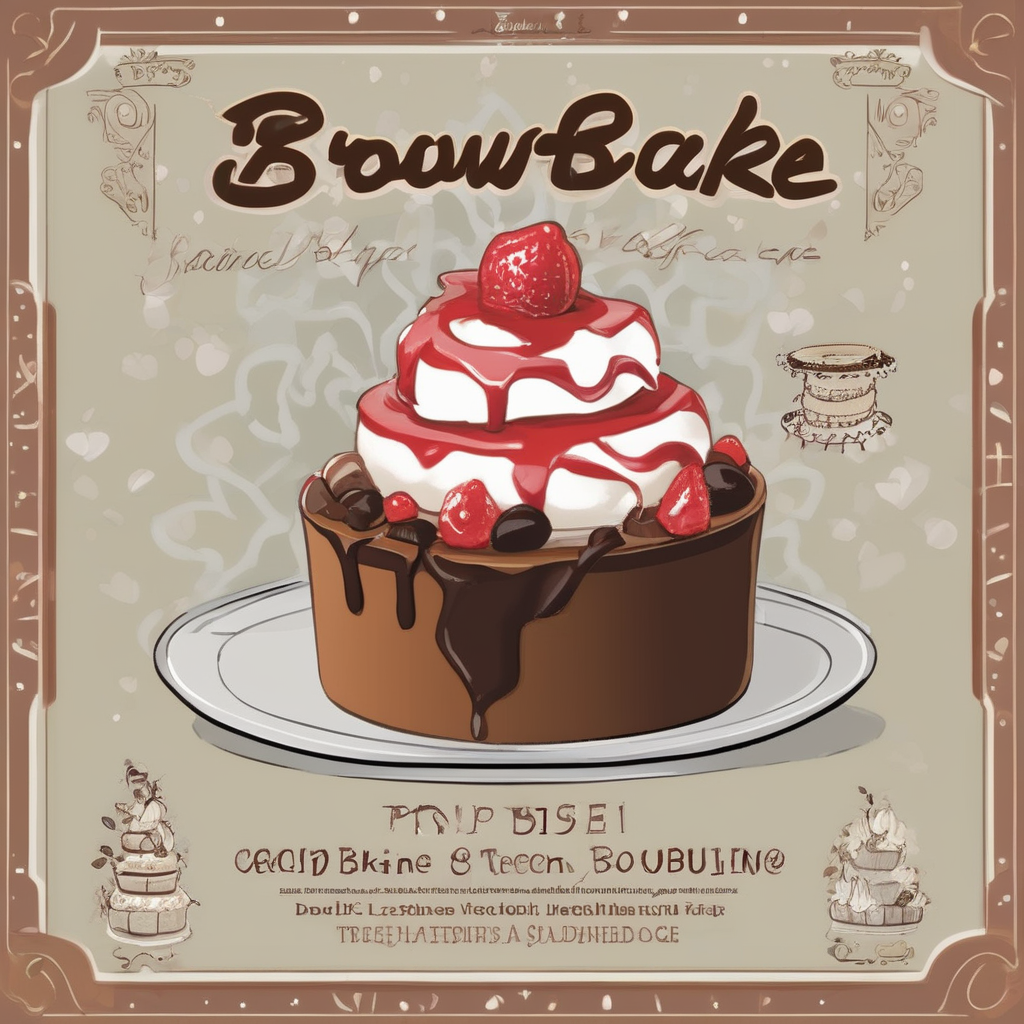

In [ ]:
# Display the generated image (Poster)
image

## Observations:

- **Visual Appeal**: ChatGPT-based image generation models like DALL-E produce high-quality, polished images with minimal distortion. In contrast, Hugging Face open-source models such as Stable Diffusion, while capable of creating strong visuals, may have text distortion and other minor imperfections.

- **Accessibility**: ChatGPT-based image generation models are highly accessible, requiring no programming skills, as they provide APIs for easy image generation. Hugging Face models, on the other hand, require some programming knowledge and setup, but offer greater customization and flexibility.

- **Use Cases**: Hugging Face open-source models like Stable Diffusion can be fine-tuned for specific tasks, making them perfect for batch automation and integration into AI pipelines. However, they require more computation and expertise. ChatGPT models (DALL-E) are more suitable for quick and creative tasks, as they offer APIs but do not provide access to fine-tuning for specialized needs.

# Task 2: Generating a Promotional Video

Now that we’ve created a stunning promotional poster for Browbake, it’s time to take our marketing to the next level with video content. Videos are powerful tools for engaging potential customers and building an emotional connection with a brand.

In this task, we’ll explore two different approaches to generate an AI-powered **promotional video** that highlights Browbake’s signature products — **fudgy brownies** and **decadent tres leches cakes**:

1. **Using Free Gen AI No-Code Tools**

2. **Using Google’s GenAI SDK and Vertex AI**

## The Prompt We Will Use

Here’s the unified prompt we'll use across both approaches to generate a compelling marketing video:

> Prompt:

> “Create a mouthwatering promotional video for Browbake, showcasing rich, fudgy brownies and decadent tres leches cakes. Use smooth, slow-motion shots of gooey chocolate, creamy textures, and fresh ingredients. Highlight the tagline: ‘Pure Indulgence, Every Bite.’ End with a call to action: ‘Order Now & Savor the Sweetness!’ Keep it warm, inviting, and irresistible.”

## Approach 1: Using Free Gen AI No-Code Tools

For users who prefer no-code solutions, there are several online **AI video generators** that can turn a text prompt into a beautiful short video. These tools are free or offer limited trial access, making them ideal for small business owners and content creators.

**Tools You Can Use:**

- **[Adobe Firefly (Video)](https://firefly.adobe.com/generate/video)** — Allows uploading an image (like our poster) and generating a video based on that.

- **[Canva AI Video Generator](https://firefly.adobe.com/generate/video)** — Easy-to-use editor with text-to-video AI features.

- **[Renderforest Text-to-Video AI](https://www.renderforest.com/text-to-video-ai)** — Good for animated and slideshow-based promos.

> Tip: You can upload the poster we generated earlier as the first frame to build consistency across your brand visuals.

## Approach 2: Using Google Vertex AI & GenAI SDK

For those with access to Google Cloud Platform(GCP) and a programming background, we can use **Google’s Vertex AI SDK** to generate an **8-second promotional video** using the **Veo 2.0 model.**

This method is ideal for automation, better control over video parameters, and deeper customization. We'll use Python to write and execute this pipeline.

**How It Works:**

1. **Authenticate Google Cloud Environment** (especially important for Colab users).

2. **Set up Vertex AI Client** by specifying project ID and location.

3. **Choose the Model** (`veo-2.0-generate-001`) to generate 8-second videos.

4. **Feed the Prompt** and configuration (duration, aspect ratio, etc.) to the model.

5. **Generate the Video** and save it locally.

6. **Preview the Final Output** for quality inspection.

### Authenticate Google Cloud Environment

In [ ]:
# Authenticate the user for Google Cloud services (necessary for Colab users)
if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()

### Set Google Cloud project information and create client

1. **Sign in to Google Cloud Console**
  - If you don't have an account, [create one here](https://console.cloud.google.com/).
  - New users receive $300 in free credits to explore Google Cloud services.

2. **Create a New Project**
  - Navigate to the [project selector page](https://console.cloud.google.com/projectselector2?inv=1&invt=AbzNVQ).
  - Click on "New Project," provide a name and billing account, then click "Create" to set up your project.
  - Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

3. **Enable Billing for Your Project**
  - In the [Billing section](https://console.cloud.google.com/billing?inv=1&invt=AbzNVQ), link your project to a billing account to activate services.

4. **Enable the Vertex AI API**
  - Go to the [Vertex AI API page](https://console.cloud.google.com/apis/enableflow?apiid=aiplatform.googleapis.com&inv=1&invt=AbzNVw&project=upbeat-repeater-461706-f6).
  - Ensure your project is selected at the top, then click "Enable" to activate the Vertex AI API for your project.



In [ ]:
# Set Google Cloud project details and create a client for Vertex AI
PROJECT_ID = "myfirstproject-461708"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}

# if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
#     PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

# Initialize the client for GenAI with project and location details
client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

### Load the video generation model

Before we proceed to load the Veo 2.0 model for our text-to-video generation task, it's beneficial to understand the foundational concepts and the reasons behind choosing this model.

1. Text-to-video generation involves creating video content from textual descriptions using advanced AI models. These models interpret the semantics of the text and generate corresponding video frames, enabling users to produce visual content without traditional filming.

2. **Challenges with Running Models Locally**
While there are open-source text-to-video models available on platforms like Hugging Face , running them locally poses challenges:

  - **Model Size**: These models are often large, requiring significant storage space.

  - **Compute Resources**: High computational power, including GPUs with substantial VRAM, is necessary for efficient processing.

  - **Complex Setup**: Setting up the environment and dependencies can be complex and time-consuming.


3. **Overview of Veo 2.0**
  - Cloud-based models, such as Google's Veo 2.0, offer several advantages auch as Scalability, Accessibility and Performace.

  - Veo 2.0 is Google's advanced text-to-video generation model available through Vertex AI. Key features include: High-Quality Output, Aspect Ratios (Supports 16:9 and 9:16 format),
  Prompt Understanding

4. **Alternative Models and Services**
Other notable text-to-video models and services include:

  - **OpenAI's Sora**: Capable of generating realistic videos from text prompts, available to ChatGPT Plus users.

  - **Runway's Gen-3 Alpha**: Offers tools for professional filmmaking with AI-generated videos.

  - **ModelScopeT2V**: An open-source model on Hugging Face for text-to-video synthesis.


In [ ]:
# Define the model you want to use for video generation (Veo 2.0 for 8-second videos)
video_model = "veo-2.0-generate-001"  # Model to generate 8-second videos

### Generate videos from a text prompt

With Veo 2, you have the option to generate 8 second videos from a text prompt. In order to generate a video in the following sample, specify the following info:
- **Prompt:** A detailed description of the video you would like to see.
- **Aspect ratio:** Select either 16:9 or 9:16.
- **Number of videos:** Set this value to 1 or 2.
- **Video duration:** Can 5, 6, 7, or 8 seconds.
- **Prompt enhancement:** The `veo-2.0-generate-001` model offers the option to enhance your provided prompt. To utilize this feature, set `enhance_prompt` to True. A new, detailed prompt will be created from your original one to help generate higher quality videos that better adhere to your prompt's intent.

When generating videos of people you can also set the `person_generation` parameter accordingly:
* `person_generation`: allow_adult, dont_allow

In [ ]:
# Define the detailed prompt for video generation
#prompt = "Create a mouthwatering promotional video for Browbake, showcasing rich, fudgy brownies and decadent tres leches cakes. Use smooth, slow-motion shots of gooey chocolate, creamy textures, and fresh ingredients. Highlight the tagline: ‘Pure Indulgence, Every Bite.’ End with a call to action: ‘Order Now & Savor the Sweetness!’ Keep it warm, inviting, and irresistible."

prompt = "Show decadent tres leches cakes and rich brownies with smooth, slow-motion shots. Include the tagline 'Pure Indulgence, Every Bite' and a call to action 'Order Now & Savor the Sweetness!'."

In [ ]:
# Define the video aspect ratio (9:16 is ideal for social media platforms like Instagram Stories)
aspect_ratio = "9:16"

# Initiate the video generation operation using the defined parameters
operation = client.models.generate_videos(
    model=video_model,
    prompt=prompt,
    config=types.GenerateVideosConfig(
        aspect_ratio=aspect_ratio,
        number_of_videos=1,  # Generating one video
        duration_seconds=8,  # Duration of the video (8 seconds)
        person_generation="dont_allow",  # Allow for adult content if applicable
        enhance_prompt=True,  # Enhance the prompt for better video quality
    ),
)

In [ ]:
# Monitor the status of the video generation operation
while not operation.done:
    time.sleep(15)  # Wait for 15 seconds before checking again
    operation = client.operations.get(operation)  # Get the updated status
    print(operation)  # Print the current status

In [ ]:
# Check if the video generation was successful
if operation.response:
    # Retrieve the generated video object
    generated_video = operation.result.generated_videos[0].video

    # Save the video locally
    local_video_filename = "promotional_video.mp4"  # Specify the filename for saving locally
    generated_video.save(local_video_filename)
    print(f"Video saved locally as: {local_video_filename}")

    # Display the generated video
    media.show_video(media.read_video(local_video_filename), height=500)

## Observations:

1. **No-Code vs Code-Based:**

  - The open-source tools are great for quick, visually appealing drafts.
  - The Vertex AI approach provides more precision and control over video quality, duration, and prompt enhancement.

2. **Customization:**

  - Google’s SDK allows prompt enhancement and fine-tuned control over video specs (aspect ratio, duration, people generation).


3. **Time & Access:**

  - The open tools work instantly via the browser.
  - Google Cloud SDK requires setup and billing account but is highly scalable and ideal for integrating into a larger marketing automation pipeline.

# Task 3: Creating a Captivating Voiceover for the Promotional Video

After designing a poster and generating a promotional video, the next step in Browbake’s marketing journey is to **add a voiceover**. A well-crafted voiceover brings life to the visuals, enhances engagement, and strengthens emotional appeal by guiding the viewer through the message in a human, relatable tone.

In this task, we’ll generate a short, expressive voiceover for Browbake’s promotional video using two approaches:

1. **Using Open-Source No-Code Voice Tools**

2. **Using Parler TTS Model with Python**

## The Prompt We Will Use

> **Full Prompt for Video:**
“Create a mouthwatering promotional video for Browbake, showcasing rich, fudgy brownies and decadent tres leches cakes. Use smooth, slow-motion shots of gooey chocolate, creamy textures, and fresh ingredients. Highlight the tagline: ‘Pure Indulgence, Every Bite.’ End with a call to action: ‘Order Now & Savor the Sweetness!’ Keep it warm, inviting, and irresistible.”

> **Voiceover Text (Shortened to Fit 4 Seconds):**
“Experience pure indulgence with every bite: fudgy brownies and luscious Tres Leches. Order now and savor the sweetness!”

## Approach 1: Using Open-Source No-Code Voice Tools

To quickly generate a natural voiceover without writing code, we can use a combination of ChatGPT and online TTS services.

**Step-by-Step:**

1. Use **[ChatGPT](https://chatgpt.com/)** to extract a short, impactful sentence from your video script (we did this using the full video prompt).

2. Copy the final sentence into a Text-to-Speech (TTS) platform like **[ElevenLabs](https://elevenlabs.io/app/sign-up)**.

3. Choose a voice style and accent that aligns with your brand identity (warm, clear, friendly, female).

4. Generate and download the audio file.

## Approach 2: Using Parler TTS Model with Python

For developers and AI enthusiasts, we can take it a step further by using **Parler TTS**, an open-source model designed for generating natural-sounding speech from text prompts and tone descriptions.

This approach gives you more flexibility and integrates easily into a larger AI pipeline.

**How It Works:**

1. Set up the environment and check if GPU is available.

2. Load the pre-trained Parler TTS model and tokenizer.

3. Write two texts:

 - A prompt (what should be said).

 - A description (how it should be said).

4. Tokenize and feed both into the model.

5. Generate the audio output.

6. Save it as a `.wav` file.

This gives us complete control over the **style, pitch, and delivery** of the voice.

### Load the Pre-trained Model

Before we proceed to load the Parler-TTS model for our text-to-speech generation task, it's beneficial to understand the foundational concepts and the reasons behind choosing this model.

- Parler-TTS is an open-source text-to-speech (TTS) model developed by Hugging Face. It generates high-quality, natural-sounding speech from text prompts. Unlike many TTS models that require audio samples to mimic a speaker's voice, Parler-TTS uses textual descriptions to control aspects like gender, pitch, speaking style, and background noise.

- Parler-TTS employs a decoder-only Transformer architecture. It takes in text and a description of the desired speech characteristics, then generates audio tokens that are converted into speech using a codec. This approach allows for fine-grained control over the generated speech's characteristics.



**Alternative Text-to-Speech Models on Hugging Face**

If you're interested in exploring other TTS models, here are some notable alternatives available on Hugging Face:

**[SpeechT5
](https://huggingface.co/microsoft/speecht5_tts):**
- Developed by Microsoft, SpeechT5 is a versatile model that supports both speech-to-text and text-to-speech tasks. It utilizes a unified encoder-decoder architecture and supports multiple speakers through x-vector speaker embeddings.

**[Fastspeech2](https://huggingface.co/facebook/fastspeech2-en-ljspeech):**
- Developed by Facebook AI using the Fairseq framework, this model is trained on the LJSpeech dataset to produce high-quality English speech with a single female voice. It leverages the FastSpeech 2 architecture, incorporating pitch, energy, and duration variations for more natural-sounding speech.

In [ ]:
# Set the device (GPU if available, otherwise use CPU)
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
# Load the Parler-TTS model and tokenizer (pre-trained models)
model = ParlerTTSForConditionalGeneration.from_pretrained("parler-tts/parler-tts-mini-v1").to(device)
tokenizer = AutoTokenizer.from_pretrained("parler-tts/parler-tts-mini-v1")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/3.51G [00:00<?, ?B/s]

  WeightNorm.apply(module, name, dim)

  "_name_or_path": "google/flan-t5-large",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 2816,
  "d_kv": 64,
  "d_model": 1024,
  "decoder_start_token_id": 0,
  "dense_act_fn": "gelu_new",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "gated-gelu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 24,
  "num_heads": 16,
  "num_layers": 24,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "tie_word_embeddings": false,
  "transformers_version": "4.46.1",
  "use_cache": true,
  "vocab_size": 32128
}

  "_name_or_path": "parler-tts/dac_44khZ_8kbps",
  "architectures": [
    "DACModel"
  ],
  "codebook_size": 1024,
  "frame_rate": 86,
  "latent_dim": 1024,
  "model_bitrate"

generation_config.json:   0%|          | 0.00/265 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

### Prompt and Description

In [ ]:
# Define the prompt (the text we want to be spoken in the voice-over)

prompt = "Experience pure indulgence with every bite: fudgy brownies and luscious Tres Leches. Order now and savor the sweetness!"

# Define the description (instructions for the voice's tone and delivery)
description = "A soft, pleasant female voice with a gentle, melodic tone, speaking slowly and clearly for a soothing and natural delivery."

### Tokenize and Pass to the Model

In [ ]:
# Tokenize the description and prompt text for the model input
tokenized_description = tokenizer(description, return_tensors="pt", return_attention_mask=True)
input_ids = tokenized_description.input_ids.to(device)
attention_mask = tokenized_description.attention_mask.to(device)

tokenized_prompt = tokenizer(prompt, return_tensors="pt", return_attention_mask=True)
prompt_input_ids = tokenized_prompt.input_ids.to(device)
prompt_attention_mask = tokenized_prompt.attention_mask.to(device)

### Generate the Voiceover

In [ ]:
# Generate the audio from the given description and prompt
generation = model.generate(
    input_ids=input_ids,
    attention_mask=attention_mask,
    prompt_input_ids=prompt_input_ids,
    prompt_attention_mask=prompt_attention_mask
)

In [ ]:
# Convert the generated output to a numpy array (audio data)
audio_arr = generation.cpu().numpy().squeeze()

# Save the generated voice-over to a .wav file
sf.write("parler_tts_out.wav", audio_arr, model.config.sampling_rate)
print("Voice-over saved as 'parler_tts_out.wav'")

Voice-over saved as 'parler_tts_out.wav'


## Observations:

1. **No-Code vs Code-Based:**

  - Tools like ChatGPT and ElevenLabs offer quick, browser-based solutions for generating voiceovers without writing code.

  - Parler TTS provides greater customization through Python, allowing fine control over voice tone, tempo, and delivery.

2. **Tone & Branding Control:**

  - Parler TTS enables rich prompt-driven modulation of voice characteristics, ideal for brand-aligned voiceovers.

  - Open tools rely on default voices, which may be less flexible for nuanced branding.

3. **Output Integration:**

  - Both approaches generate high-quality .wav files, which are easy to merge into promotional videos for a professional finish.

# Task 4: Combine Promotional Video with Voice Over

In this final task, we will bring together the visually appealing promotional video generated in Task 2 and the soothing, brand-aligned voice-over created in Task 3. This will result in a cohesive and professional marketing asset for Browbake—ready to be shared across digital platforms like Instagram, YouTube, or in-store displays.

We'll be using MoviePy, a Python library for video editing, to programmatically merge the `.mp4` promotional video with the `.wav` voice-over audio. This will help in building a seamless final output that enhances customer engagement and brand storytelling.

**Steps:**

- Load the promotional video file generated by Veo 2.0.

- Load the voice-over file generated using Parler TTS.

- Merge the audio with the video.

- Export the final video with synchronized visuals and narration.

In [ ]:
# Load the promotional video file (ensure the file exists in your working directory)
video = VideoFileClip("promotional_video.mp4")

# Load the generated voice-over audio file
audio = AudioFileClip("parler_tts_out.wav")

In [ ]:
# Set the loaded audio as the video's audio track
final_video_with_audio = video.set_audio(audio)

# Export the final video with the voice-over included
final_video_with_audio.write_videofile("final_browbake_promo_video.mp4", fps=24)

# Conclusion

Through the power of Generative AI, Browbake has taken a major step toward building a strong brand presence with minimal manual effort. In this project, we successfully created visually appealing AI-generated posters, crafted a promotional video using text-to-video models, and added a personalized voice-over with expressive tone using Parler-TTS. Finally, we combined these elements into a professional marketing video that can help Browbake attract and engage customers across digital platforms.

This pipeline demonstrates how even a small bakery can harness modern AI tools to produce high-quality marketing content-without needing a graphic designer, videographer, or voice artist. It highlights the potential for small businesses to use AI creatively, not just for automation, but also for storytelling, branding, and customer engagement in a highly competitive market.

<font size=6 color='navyblue'>Power Ahead</font>
___